# Libraries
Kumpulan Library yang digunakan untuk proyek RPS Game (preprocessing part) :

In [1]:
import os
import random
import shutil
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Create Validation
Membuat validasi berdasarkan dataset yang ada

In [2]:
def create_val_folder(train_folder, val_folder, val_percentage):
    # Membuat folder val jika belum ada
    if not os.path.exists(val_folder):
        os.makedirs(val_folder)
    
    # Mengambil daftar subfolder (kelas) di dalam folder train
    classes = os.listdir(train_folder)

    for class_name in classes :
        train_class_folder = os.path.join(train_folder, class_name)
        val_class_folder = os.path.join(val_folder, class_name)

        # Membuat subfolder val untuk setiap kelas jika belum ada
        if not os.path.exists(val_class_folder):
            os.makedirs(val_class_folder)

        # Mengambil daftar gambar di dalam subfolder train untuk setiap kelas
        images = os.listdir(train_class_folder)

        # Menghitung jumlah gambar yang akan dipindahkan ke val
        num_val_images = int(len(images) * val_percentage)
        val_images = random.sample(images, num_val_images)

        # Memindahkan gambar ke subfolder val
        for val_image in val_images:
            src_path = os.path.join(train_class_folder, val_image)
            dest_path = os.path.join(val_class_folder, val_image)
            shutil.move(src_path, dest_path)

In [3]:
if __name__ == "__main__":
    # Atur path folder train dan val
    train_folder_path = "./Dataset/train"
    val_folder_path = "./Dataset/val"  # Different folder for val

    # Atur persentase gambar untuk val (misalnya, 10%)
    val_percentage = 0.1

    # Buat subfolder val dan pindahkan gambar
    create_val_folder(train_folder_path, val_folder_path, val_percentage)

# Train Dataset
Melakukan Training untuk dataset yang ada

## Membersihkan dataset

In [4]:
train_dir = "./Dataset/train"

categories = ["paper", "rock", "scissors"]

size_threshold = (10,10)
valid_extensions=('.jpg', '.png', '.jpeg')

def is_image_corrupt(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return True
        return False
    except:
        return True



def is_image_below_threshold(img_path):
    img = cv2.imread(image_path)
    if img.shape <= size_threshold:
        print(img.shape)
        return True
    return False


for each_category in categories:
    folder_path = os.path.join(train_dir, each_category)
    for each_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, each_file)
        if os.path.isfile(image_path) and each_file.lower().endswith(valid_extensions):
            if is_image_corrupt(image_path) or is_image_below_threshold(image_path):
                os.remove(image_path)
                print(f"Removed corrupt image: {each_file}")

## Distribusi Dataset

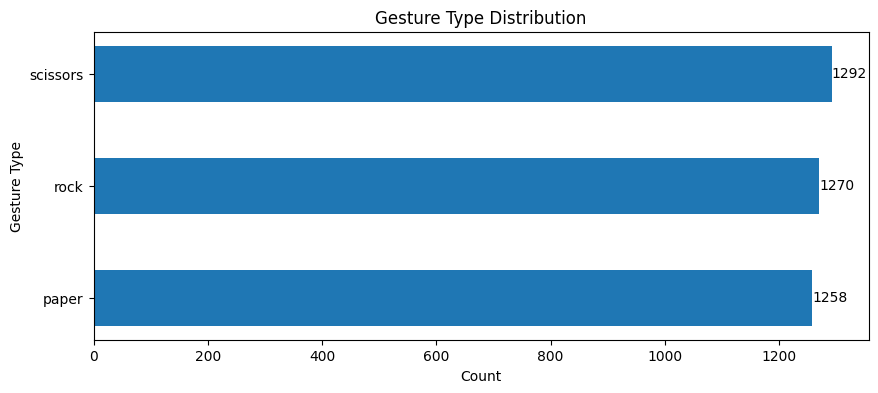

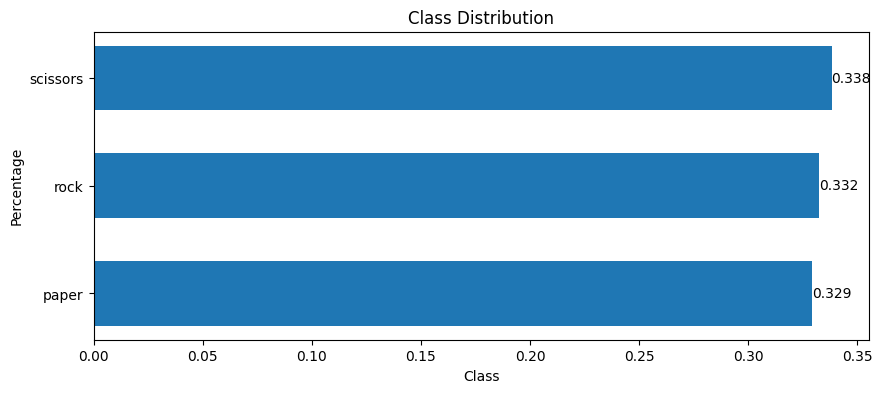

In [5]:
train_dir = "./Dataset/train"
valid_extensions=('.jpg', '.png', '.jpeg')

categories = ["paper", "rock", "scissors"]
category_count = {}

for each_category in categories:
    folder_path = os.path.join(train_dir, each_category)
    valid_images = [file for file in os.listdir(folder_path) if file.lower().endswith(valid_extensions)]
    category_count[each_category] = len(valid_images)

fig, ax = plt.subplots(figsize=(10, 4))

# Bar chart
bar_plot = plt.barh(list(category_count.keys()), list(category_count.values()), 0.5)
plt.title('Gesture Type Distribution')
plt.xlabel('Count')
plt.ylabel('Gesture Type')
for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(list(category_count.values())[i]), ha='left', va='center')

plt.show()

sample_size = sum(category_count.values())
class_dist = {key : val/sample_size for key, val in category_count.items()}
fig, ax = plt.subplots(figsize=(10, 4))


# Bar chart
bar_plot = plt.barh(list(class_dist.keys()), list(class_dist.values()), 0.6)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(round(list(class_dist.values())[i], 3)), ha='left', va='center')

plt.show()

## Menghitung jumlah gambar pada Dataset

In [6]:
def count_images_in_folder(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        count += len(files)
    return count

def count_images_in_each_set(train_folder, test_folder, val_folder):
    train_count = count_images_in_folder(train_folder)
    test_count = count_images_in_folder(test_folder)
    val_count = count_images_in_folder(val_folder)

    return train_count, test_count, val_count

if __name__ == "__main__":
    # Atur path folder train, test, dan val
    train_folder_path = "./Dataset/train"
    test_folder_path = "./Dataset/test"
    val_folder_path = "./Dataset/val"

    # Hitung jumlah gambar di setiap folder
    train_count, test_count, val_count = count_images_in_each_set(train_folder_path, test_folder_path, val_folder_path)

    # Tampilkan hasil
    print(f"Jumlah gambar di set pelatihan (train): {train_count}")
    print(f"Jumlah gambar di set pengujian (test): {test_count}")
    print(f"Jumlah gambar di set validasi (val): {val_count}")

Jumlah gambar di set pelatihan (train): 3820
Jumlah gambar di set pengujian (test): 372
Jumlah gambar di set validasi (val): 423


## Klasifikasi Gambar/Gesture

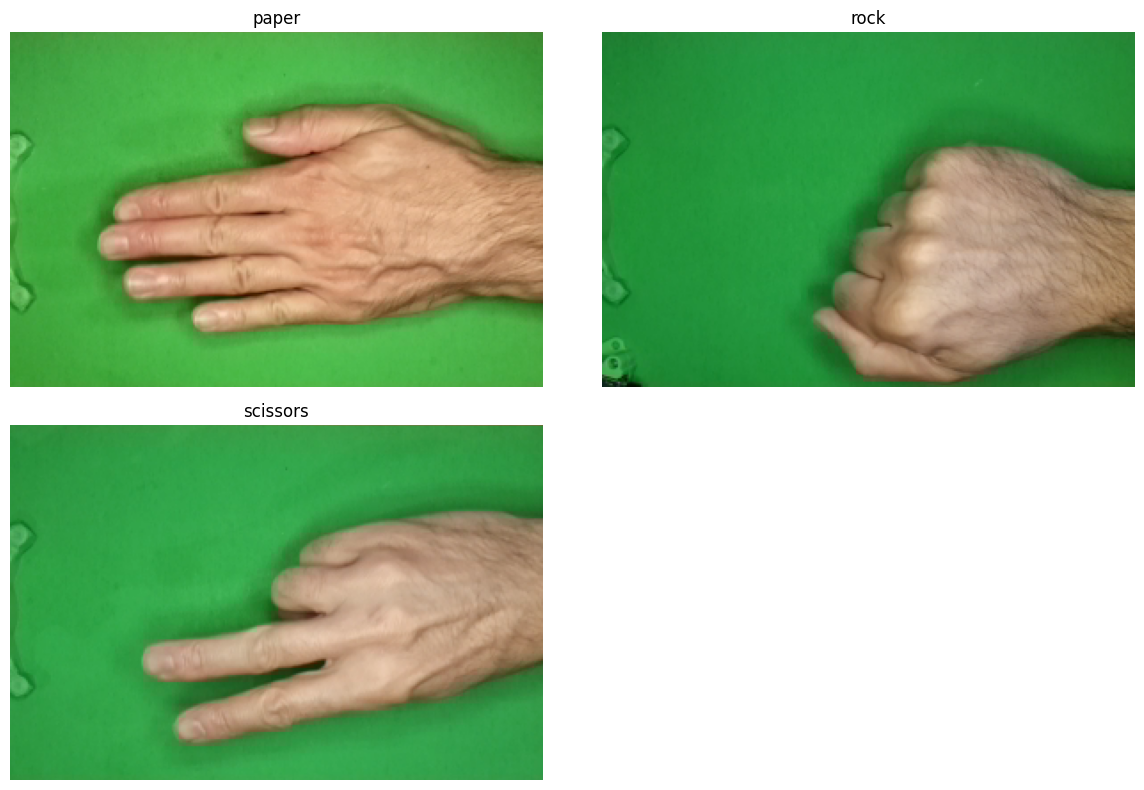

In [7]:
train_dir = "./Dataset/train"
valid_extensions=('.jpg', '.png', '.jpeg')

categories = ["paper", "rock", "scissors"]

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    if not image_path.lower().endswith(valid_extensions):
        continue
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

### Mengecek Ukuran/Shape Gambar

In [9]:
img = cv2.imread('./Dataset/train/scissors/scissors01-000.png')
img.shape

(300, 300, 3)

## Gray Scale

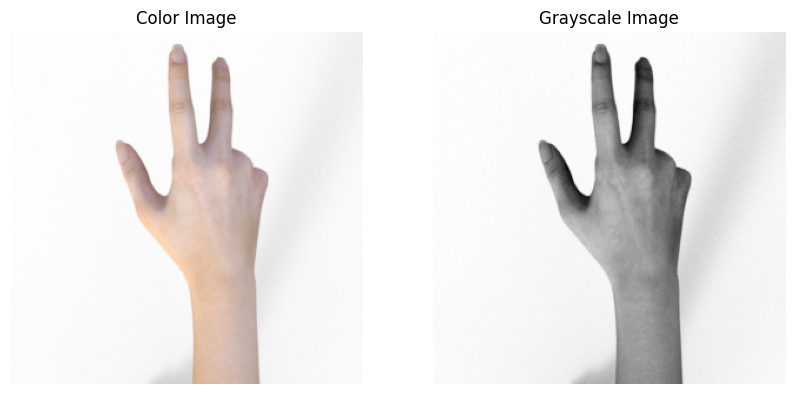

In [11]:
# Load a color image
color_image_path = './Dataset/train/scissors/scissors01-000.png'
color_image = cv2.imread(color_image_path)
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper visualization

# Convert the color image to grayscale
grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)

# Plot side by side
plt.figure(figsize=(10, 5))

# Plot color image
plt.subplot(1, 2, 1)
plt.imshow(color_image)
plt.title('Color Image')
plt.axis('off')

# Plot grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

# Train Dataset menggunakan YOLOv8

In [12]:
model = YOLO('yolov8m-cls.pt')  # load a pretrained YOLOv8n classification model

# train/pre-tuned the model on our dataset
model.train(data='./Dataset', epochs=2)

100%|██████████| 32.7M/32.7M [00:09<00:00, 3.57MB/s]


New https://pypi.org/project/ultralytics/8.0.231 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.229 🚀 Python-3.11.1 torch-2.1.2+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=./Dataset, epochs=2, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save

train: Scanning C:\Programming\Python\AI Lab\RPS_Game\Dataset\train... 3820 images, 0 corrupt: 100%|██████████| 3820/3820 [00:02<00:00, 1615.22it/s]


train: New cache created: C:\Programming\Python\AI Lab\RPS_Game\Dataset\train.cache


val: Scanning C:\Programming\Python\AI Lab\RPS_Game\Dataset\val... 423 images, 0 corrupt: 100%|██████████| 423/423 [00:00<00:00, 694.61it/s]


val: New cache created: C:\Programming\Python\AI Lab\RPS_Game\Dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
2 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

                   all      0.993          1



2 epochs completed in 0.295 hours.
Optimizer stripped from runs\classify\train\weights\last.pt, 31.7MB
Optimizer stripped from runs\classify\train\weights\best.pt, 31.7MB

Validating runs\classify\train\weights\best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.11.1 torch-2.1.2+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
YOLOv8m-cls summary (fused): 103 layers, 15766499 parameters, 0 gradients, 41.6 GFLOPs
train: C:\Programming\Python\AI Lab\RPS_Game\Dataset\train... found 3820 images in 3 classes ✅ 
val: C:\Programming\Python\AI Lab\RPS_Game\Dataset\val... found 423 images in 3 classes ✅ 
test: C:\Programming\Python\AI Lab\RPS_Game\Dataset\test... found 372 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:16<00:00,  1.20s/it]


                   all      0.995          1
Speed: 0.0ms preprocess, 36.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train
Results saved to runs\classify\train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000024FCE1A7290>
curves: []
curves_results: []
fitness: 0.9976359307765961
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9952718615531921, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9976359307765961}
save_dir: WindowsPath('runs/classify/train')
speed: {'preprocess': 0.0, 'inference': 36.424357276718105, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.9952718615531921
top5: 1.0